In [4]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

In [5]:
def rate_vector(g,d,c,theta,f,m,b,w):
    return(numpy.array([b*(1.0-b)*(f*theta/(theta+1.0)+1)-(theta+m)*w*b/(b+c),
                        -d*w+g*(theta+m)*w*b/(b+c)]))

def vector_field(g,d,c,theta,f,m,b_max,w_max,num_b=20,num_w=20):
    b_field = numpy.linspace(0,b_max,num_b)
    w_field = numpy.linspace(0,w_max,num_w)
    b_vector = numpy.zeros([num_b,num_w])
    w_vector = numpy.zeros([num_b,num_w])
    for w_lupe in range(w_field.shape[0]):
        for b_lupe in range(b_field.shape[0]):
            w = w_field[w_lupe]
            b = b_field[b_lupe]
            deriv = rate_vector(g,d,c,theta,f,m,b,w)
            b_vector[w_lupe][b_lupe] = deriv[0]
            w_vector[w_lupe][b_lupe] = deriv[1]
            length = numpy.sqrt(b_vector[w_lupe][b_lupe]*b_vector[w_lupe][b_lupe]+
                                w_vector[w_lupe][b_lupe]*w_vector[w_lupe][b_lupe])
            if(numpy.fabs(length)>1e-5):
                b_vector[w_lupe][b_lupe] /= length
                w_vector[w_lupe][b_lupe] /= length

    return([b_field,w_field,b_vector,w_vector])



In [6]:

def plot_phase(g,d,c,theta,f,m,b_max=2,w_max=2,initial_b=0.2,initial_w=0.2):
    b_plot = numpy.linspace(0,b_max,100)
    w_plot = numpy.linspace(0,w_max,100)

    b_nullcline_one = numpy.array([b_plot,(f*theta/(1.0+theta)+1)*(1.0-b_plot)*(c+b_plot)/(theta+m)])
    b_nullcline_two = numpy.array([[0.0,0.0],[0.0,w_max]])

    w_nullcline_one = numpy.array([[d*c/((theta+m)*g-d),d*c/((theta+m)*g-d)],[0.0,w_max]])
    w_nullcline_two = numpy.array([[0.0,b_max],[0.0,0.0]])

    [b_field,w_field,b_vector,w_vector] = vector_field(g,d,c,theta,f,m,b_max,w_max,20,20)

    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.set_xlabel("b")
    axes.set_ylabel("w")
    axes.set_title("b/w phase plane, $\\theta$={0}".format(theta))
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
    axes.set_xlim(-0.1, b_max)
    axes.set_ylim(-0.1, w_max)

    axes.plot(b_nullcline_one[0],b_nullcline_one[1],'r')
    axes.plot(b_nullcline_two[0],b_nullcline_two[1],'r')

    axes.plot(w_nullcline_one[0],w_nullcline_one[1],'b')
    axes.plot(w_nullcline_two[0],w_nullcline_two[1],'b')

    axes.quiver(b_field,w_field,b_vector,w_vector)
    
    #t = numpy.linspace(0,10,100)
    #initial = numpy.array([initial_b,initial_w])
    #approx, info_dict = integrate.odeint(rate_vector,initial,t,full_output=True)

    return([plt,axes])


In [11]:
def linearization_eigenvalues(g,d,c,theta,f,m,axes):
    
    b = d*c/((theta+m)*g-d)
    w = (f*theta/(1.0+theta)+1)*(1.0-b)*(c+b)/(theta+m)
    axes.plot(b,w,'g*')

    J11 = (1.0-2.0*b)*(f*theta/(1.0+theta)+1.0)-(theta+m)*w*c/((c+b)*(c+b))
    J12 = -(theta+m)*b/(c+b)
    J21 = g*(theta+m)*w*c/((c+b)*(c+b))
    J22 = -d + g*(theta+m)*b/(c+b)
    #print(J11,J12,J21,J22)
    discriminant = J11*J11+4.0*J12*J21
    #print(discriminant)
    
    eig1_real = 0.0
    eig1_imag = 0.0
    
    eig2_real = 0.0
    eig2_imag = 0.0
    
    if(discriminant<0):
        eig1_real = J11*0.5
        eig2_real = eig1_real
        
        eig1_imag = numpy.sqrt(-discriminant)*0.5
        eig2_imag = -eig1_imag
        
        print("Complex: real: {0} imag: {1}".format(eig1_real,eig1_imag))
        
    else:
        eig1_real = (J11-numpy.sqrt(discriminant))*0.5
        eig2_real = (J11+numpy.sqrt(discriminant))*0.5
        
        print("Real: eig1: {0} eig2: {1}".format(eig1_real,eig2_real))
    
    
    return([eig1_real,eig1_imag,eig2_real,eig2_imag])

Real: eig1: -0.29253711487791634 eig2: 29.62587044821125


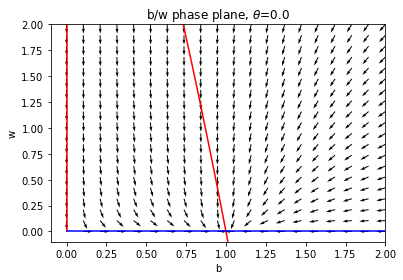

Complex: real: -0.5686274509803921 imag: 0.7141401510382083


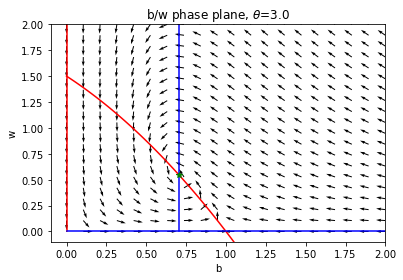

Complex: real: -0.18597320724980299 imag: 1.5993769282998345


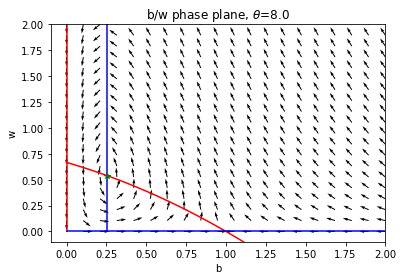

Complex: real: -0.11008039579468143 imag: 1.7558816593665363


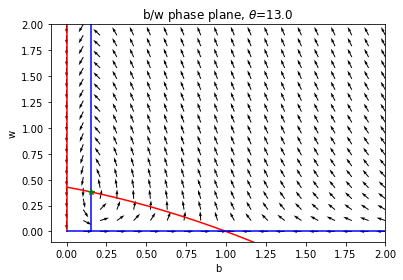

In [12]:
g     = 3.0
d     = 2.0
c     = 3.0
theta = 3.0
f     = 1.0
m     = 0.5

[plt0,axes0] = plot_phase(g,d,c,0.0,f,m)
linearization_eigenvalues(g,d,c,0.0,f,m,axes0)
plt0.show()


[plt1,axes1] = plot_phase(g,d,c,theta,f,m)
linearization_eigenvalues(g,d,c,theta,f,m,axes1)
plt1.show()

[plt2,axes2] = plot_phase(g,d,c,theta+5.0,f,m)
linearization_eigenvalues(g,d,c,theta+5.0,f,m,axes2)
plt2.show()

[plt3,axes3] = plot_phase(g,d,c,theta+10.0,f,m)
linearization_eigenvalues(g,d,c,theta+10.0,f,m,axes3)
plt3.show()

